# 1

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt

def y_fct(theta):
    # Depends on your objective function
    return math.pow(theta, 2)  - 6 * theta + 11

def parameter_path(eta, theta_0):
    ''' 
    eta : Learning rate 
    theta_0: The initial value of the parameter
    '''
    theta = theta_0
    theta_path = [theta]
    y_path = [y_fct(theta)]
    for i in range(50):
        # Depends on your objective function 
        theta_next = theta - eta * (2 * theta  - 6) 
        theta_path.append(theta_next)
        y_path.append(y_fct(theta_next))
        theta  = theta_next
    return theta_path, y_path

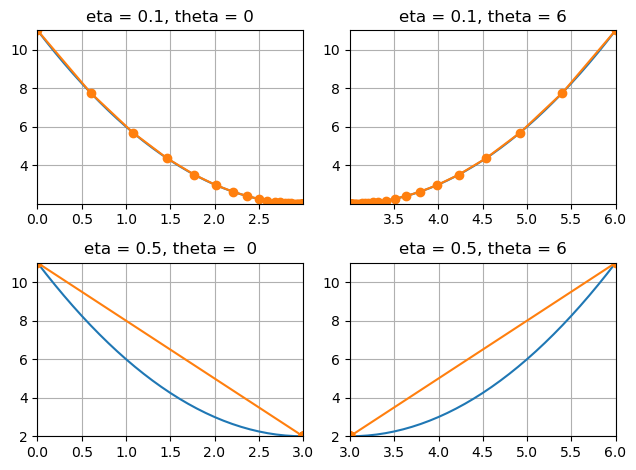

In [2]:
theta = np.arange(-10, 10, 0.1)
y = np.power(theta, 2)  - 6 * theta + 11

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 2, 1)
theta_path, y_path = parameter_path(0.1, 0)
plt.plot(theta, y, '-')
plt.plot(theta_path, y_path, 'o-')
plt.grid()
plt.axis([min(theta_path), max(theta_path), min(y_path), max(y_path) ])
plt.title("eta = 0.1, theta = 0")

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 2, 2)
theta_path, y_path = parameter_path(0.1, 6)
plt.plot(theta, y, '-')
plt.plot(theta_path, y_path, 'o-')
plt.grid()
plt.axis([min(theta_path), max(theta_path), min(y_path), max(y_path) ])
plt.title("eta = 0.1, theta = 6")

plt.subplot(2, 2, 3)
theta_path, y_path = parameter_path(0.5, 0)
plt.plot(theta, y, '-')
plt.plot(theta_path, y_path, 'o-')
plt.grid()
plt.axis([min(theta_path), max(theta_path), min(y_path), max(y_path) ])
plt.title("eta = 0.5, theta =  0")

plt.subplot(2, 2, 4)
theta_path, y_path = parameter_path(0.5, 6)
plt.plot(theta, y, '-')
plt.plot(theta_path, y_path, 'o-')
plt.grid()
plt.axis([min(theta_path), max(theta_path), min(y_path), max(y_path) ])
plt.title("eta = 0.5, theta = 6")

# Show the figure.
plt.tight_layout() 
plt.show()

# 2 

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np
import random

In [4]:
theta= np.array([[ 4 ],[ 3 ]])
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

def noise_effect(a): 
    m = 100 
    np.random.seed(68) 
    X = 2* np.random.rand(m,1)
    np.random.seed(76)
    y = 4 + 3 * X + a * np.random.randn (m,1)
    X_b = np.c_[np.ones((m,1)),X]
    
    # Please check out lecture 5.ipynb
    theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)
    ypredicted = X_b.dot(theta_best)
    rmse = np.sqrt(mean_squared_error( y , ypredicted ))
    
    return theta_best, rmse

In [5]:
noise_effect( 1 ) # 三個值分別為：theta_best_values[0][a-1], theta_best_values[1][a-1], percent_error[a-1]

(array([[3.74570384],
        [3.31633466]]),
 0.7920022147268831)

In [6]:
z = noise_effect( 1 )
z[0] # z 陣列表達方式

array([[3.74570384],
       [3.31633466]])

In [7]:
a_values = range(1,11)
rmse_values = np.zeros(10)
theta_best_values = np.zeros((2,10))
percent_error = np.zeros(10)

for a in a_values:
    z = noise_effect( a )
    rmse_values[a-1]= z[ 1 ]
    theta_best_values[0][a-1] = z[0][ 0 ]
    theta_best_values[1][a-1] = z[0][ 1 ]
    percent_error[a-1] = np.linalg.norm(theta - z[ 0 ]) / np.linalg.norm(theta)
    
print(theta_best_values)
print(rmse_values)
print(percent_error)

[[3.74570384 3.49140768 3.23711152 2.98281536 2.72851921 2.47422305
  2.21992689 1.96563073 1.71133457 1.45703841]
 [3.31633466 3.63266932 3.94900398 4.26533864 4.58167331 4.89800797
  5.21434263 5.53067729 5.84701195 6.16334661]]
[0.79200221 1.58400443 2.37600664 3.16800886 3.96001107 4.75201329
 5.5440155  6.33601772 7.12801993 7.92002215]
[0.08117491 0.16234982 0.24352473 0.32469964 0.40587455 0.48704947
 0.56822438 0.64939929 0.7305742  0.81174911]


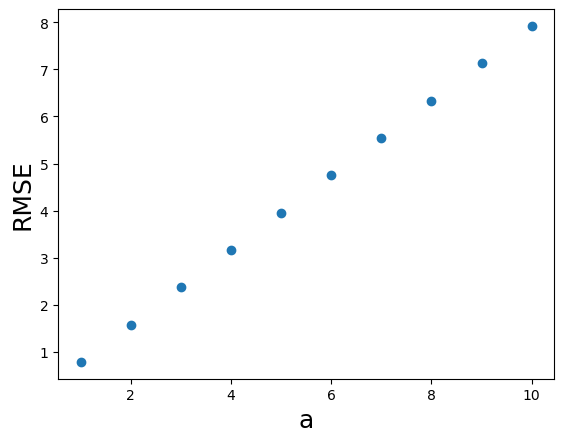

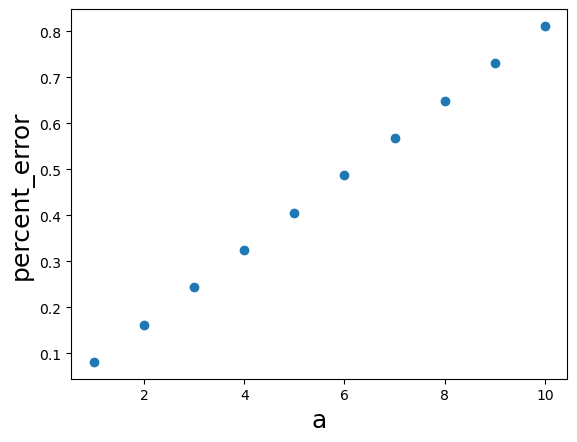

In [8]:
import matplotlib
import matplotlib.pyplot as plt

a_vs_rmse = np.c_[a_values,rmse_values]
a_vs_percent_error = np.c_[a_values,percent_error]

plt.scatter(*zip(*a_vs_rmse))
plt.xlabel("a", fontsize = 18)
plt.ylabel("RMSE", rotation = 90, fontsize = 18)
plt.show()
plt.scatter(*zip(*a_vs_percent_error))
plt.xlabel("a", fontsize=18)
plt.ylabel("percent_error", rotation=90, fontsize=18)
plt.show()